In [1]:
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt 
import numpy as np
import cv2
from config import *

CATEGORIES_REV = {
    0: 'alert', 1: 'button', 2: 'card', 3:'checkbox_checked',
    4: 'checkbox_unchecked', 5: 'chip', 6: 'data_table', 7:'dropdown_menu',
    8: 'floating_action_button', 9: 'grid_list', 10: 'image', 11: 'label', 12: 'menu',
    13: 'radio_button_checked', 14: 'radio_button_unchecked', 15: 'slider', 16: 'switch_disabled',
    17: 'switch_enabled', 18: 'text_area', 19: 'text_field', 20: 'tooltip'
}

In [2]:
class InputDate:
    __slots__ = ['images', '__index', 'labels', '_size']
    shape = (224, 224, 1)
    
    def __init__(self, _size: int) -> None:
        self.images = np.empty((_size,) + self.shape, dtype='float16')
        self.labels = np.empty(_size, dtype='uint8')
        
        self.__index = 0
        self._size = _size
    
    def add_img(self, _path: str, _cat: int) -> None:
        p = f"data/train/{CATEGORIES_REV[_cat]}/{_path}"
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        img = cv2.bitwise_not(img)
        
        self.images[self.__index] = \
            np.asarray(img).astype('float32').reshape(self.shape) / 255
        self.labels[self.__index] = _cat
        self.__index += 1
        
        if self.__index == self._size:
            self.__done()
            return
            
        print(f"[+] Progress: {self.__index}/{self._size}")
    
    def __done(self):
        self.labels = to_categorical(self.labels)
        print(f"[+] DONE {self._size}/{self._size}")
    
    def show(self, _i: int) -> None:
        plt.imshow(self.images[_i], cmap='gray')

In [3]:
import pandas as pd

train_input_f = pd.read_csv('data/processed/train_set.csv')

td = InputDate(len(train_input_f))

for i, _path, _cat in train_input_f.values:
    td.add_img(_path, _cat)

[+] Progress: 1/14629
[+] Progress: 2/14629
[+] Progress: 3/14629
[+] Progress: 4/14629
[+] Progress: 5/14629
[+] Progress: 6/14629
[+] Progress: 7/14629
[+] Progress: 8/14629
[+] Progress: 9/14629
[+] Progress: 10/14629
[+] Progress: 11/14629
[+] Progress: 12/14629
[+] Progress: 13/14629
[+] Progress: 14/14629
[+] Progress: 15/14629
[+] Progress: 16/14629
[+] Progress: 17/14629
[+] Progress: 18/14629
[+] Progress: 19/14629
[+] Progress: 20/14629
[+] Progress: 21/14629
[+] Progress: 22/14629
[+] Progress: 23/14629
[+] Progress: 24/14629
[+] Progress: 25/14629
[+] Progress: 26/14629
[+] Progress: 27/14629
[+] Progress: 28/14629
[+] Progress: 29/14629
[+] Progress: 30/14629
[+] Progress: 31/14629
[+] Progress: 32/14629
[+] Progress: 33/14629
[+] Progress: 34/14629
[+] Progress: 35/14629
[+] Progress: 36/14629
[+] Progress: 37/14629
[+] Progress: 38/14629
[+] Progress: 39/14629
[+] Progress: 40/14629
[+] Progress: 41/14629
[+] Progress: 42/14629
[+] Progress: 43/14629
[+] Progress: 44/146

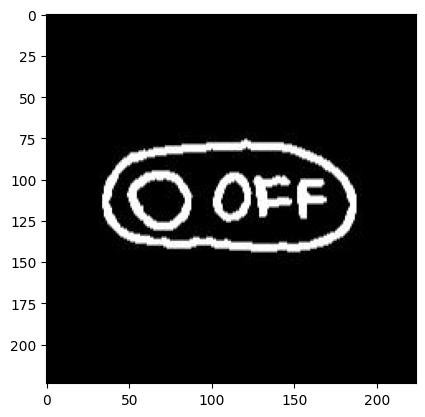

In [4]:
td.show(14628)

In [5]:
test_input_f = pd.read_csv('data/processed/test_set.csv')

test_d = InputDate(len(test_input_f))

for i, _path, _cat in test_input_f.values:
    test_d.add_img(_path, _cat)

[+] Progress: 1/770
[+] Progress: 2/770
[+] Progress: 3/770
[+] Progress: 4/770
[+] Progress: 5/770
[+] Progress: 6/770
[+] Progress: 7/770
[+] Progress: 8/770
[+] Progress: 9/770
[+] Progress: 10/770
[+] Progress: 11/770
[+] Progress: 12/770
[+] Progress: 13/770
[+] Progress: 14/770
[+] Progress: 15/770
[+] Progress: 16/770
[+] Progress: 17/770
[+] Progress: 18/770
[+] Progress: 19/770
[+] Progress: 20/770
[+] Progress: 21/770
[+] Progress: 22/770
[+] Progress: 23/770
[+] Progress: 24/770
[+] Progress: 25/770
[+] Progress: 26/770
[+] Progress: 27/770
[+] Progress: 28/770
[+] Progress: 29/770
[+] Progress: 30/770
[+] Progress: 31/770
[+] Progress: 32/770
[+] Progress: 33/770
[+] Progress: 34/770
[+] Progress: 35/770
[+] Progress: 36/770
[+] Progress: 37/770
[+] Progress: 38/770
[+] Progress: 39/770
[+] Progress: 40/770
[+] Progress: 41/770
[+] Progress: 42/770
[+] Progress: 43/770
[+] Progress: 44/770
[+] Progress: 45/770
[+] Progress: 46/770
[+] Progress: 47/770
[+] Progress: 48/770
[

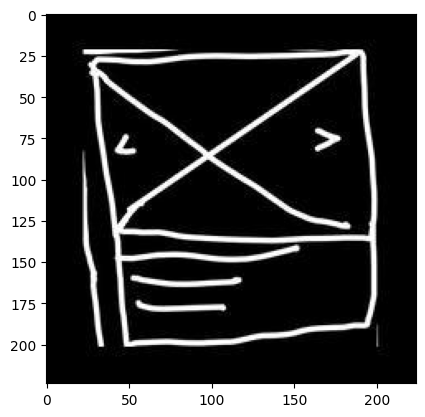

In [6]:
test_d.show(345)

In [7]:
from tensorflow.keras import layers, models

h_activ, f_activ = 'relu', 'softmax'
kernel_s, pool_s = (3, 3), (2, 2)

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_s, activation=h_activ, input_shape=td.shape))
model.add(layers.MaxPooling2D(pool_size=pool_s))
model.add(layers.Conv2D(64, kernel_s, activation=h_activ))
model.add(layers.MaxPooling2D(pool_size=pool_s))
model.add(layers.Conv2D(64, kernel_s, activation=h_activ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=h_activ))
model.add(layers.Dense(COUNT, activation=f_activ))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(td.images, td.labels, epochs=9, batch_size=64, validation_split=0.2)
model.save('models/model_v0.2.h5')

Epoch 1/9
183/183 [==============================] - 280s 2s/step - loss: 1.7117 - accuracy: 0.4908 - val_loss: 1.3170 - val_accuracy: 0.6073
Epoch 2/9
183/183 [==============================] - 267s 1s/step - loss: 0.8848 - accuracy: 0.7318 - val_loss: 1.2471 - val_accuracy: 0.6456
Epoch 3/9
183/183 [==============================] - 263s 1s/step - loss: 0.3752 - accuracy: 0.8842 - val_loss: 1.4488 - val_accuracy: 0.6405
Epoch 4/9
183/183 [==============================] - 262s 1s/step - loss: 0.1344 - accuracy: 0.9625 - val_loss: 2.0058 - val_accuracy: 0.6224
Epoch 5/9
183/183 [==============================] - 260s 1s/step - loss: 0.0771 - accuracy: 0.9833 - val_loss: 2.2621 - val_accuracy: 0.6425
Epoch 6/9
183/183 [==============================] - 260s 1s/step - loss: 0.0313 - accuracy: 0.9940 - val_loss: 2.6000 - val_accuracy: 0.6364
Epoch 7/9
183/183 [==============================] - 267s 1s/step - loss: 0.0322 - accuracy: 0.9945 - val_loss: 2.3929 - val_accuracy: 0.6384
Epoch 

C:\Users\julia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
from tensorflow.keras.models import load_model

model_test = load_model('model_v0.1.h5')

test_loss, test_acc = model_test.evaluate(test_d.images, test_d.labels)
print(f'Test accuracy: {test_acc}')

25/25 [==============================] - 5s 168ms/step - loss: 2.4549 - accuracy: 0.6506
Test accuracy: 0.65064936876297
